### BANK Marketing - 포르투칼의 은행에서 고객에게 예금 상품을 전화 통보, 결과를 예측 3가지 클러스터링 방식으로 고객들을 클러스터링하세요.

상품에 가입한 사람과 가입하지 않은 사람들을 미리 예측할 수 있을까 하는 기대

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
df.isna().sum(), df.isna().sum().sum() 

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64, 0)

In [3]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
(df['y']=='yes').mean()

0.11523999115239991

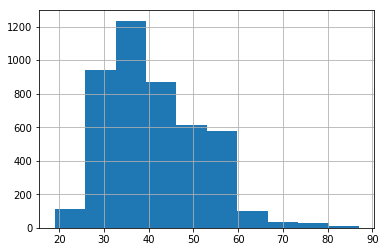

In [5]:
df['age'].hist()

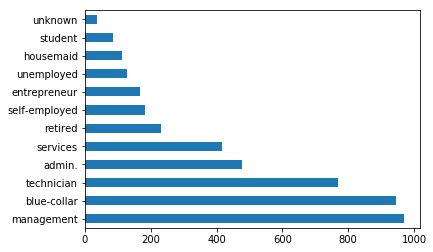

In [6]:
j = df['job']
j.value_counts().plot.barh()

In [7]:
time_y = df.loc[:, ['duration','y']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C00E204F60>]],
      dtype=object)

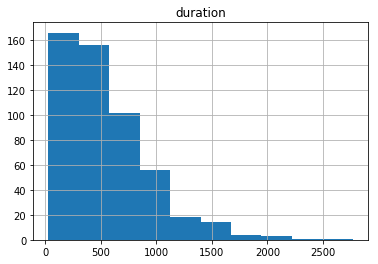

In [8]:
time_y[time_y['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C00E272A58>]],
      dtype=object)

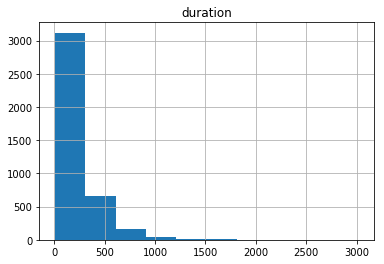

In [9]:
time_y[time_y['y']=='no'].hist()

In [10]:
np.array(df.values)

array([[30, 'unemployed', 'married', ..., 0, 'unknown', 'no'],
       [33, 'services', 'married', ..., 4, 'failure', 'no'],
       [35, 'management', 'single', ..., 1, 'failure', 'no'],
       ...,
       [57, 'technician', 'married', ..., 0, 'unknown', 'no'],
       [28, 'blue-collar', 'married', ..., 3, 'other', 'no'],
       [44, 'entrepreneur', 'single', ..., 7, 'other', 'no']],
      dtype=object)

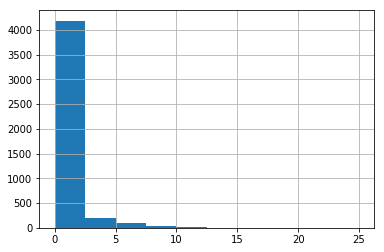

In [11]:
df.previous.hist()

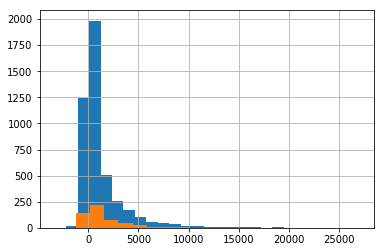

In [12]:
# EDA(탐색적 데이터 분석)
# 데이터[조건]
df[df.balance < 20000].balance.hist(bins=20)
df[df.y == 'yes'].balance.hist(bins=20)

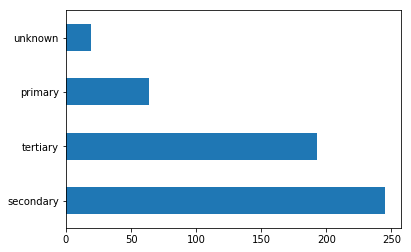

In [13]:
df[df.y =='yes'].education.value_counts().plot.barh()

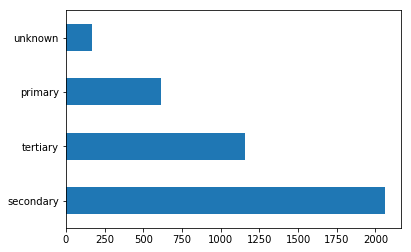

In [14]:
df[df.y =='no'].education.value_counts().plot.barh()

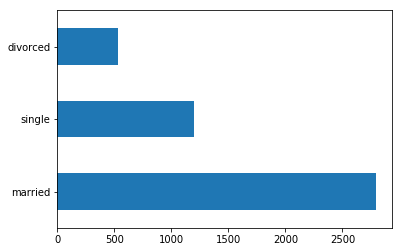

In [15]:
df.marital.value_counts().plot.barh()

In [16]:
j = df['job']

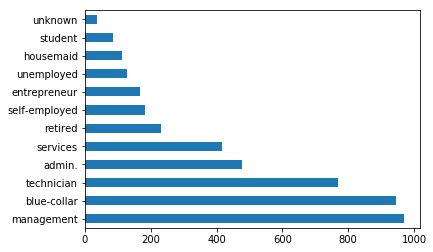

In [17]:
j.value_counts().plot.barh()

- 3가지 클러스터링(비교사 학습)을 하세요
  1. 문자를 숫자로 원핫 인코딩
  1. 2차원으로 축소 PCA
  1. K-means(k선택), 병합군집(k선택), DBSCAN(eps거리 조절)
  1. scatter 그래프로 시각화
- 결정 트리(교사학습)
  1. 원핫 인코딩
  2. x,y 분리
  3. 결정트리 학습
  4. 트리 그래프로 시각화
   - 고객에게 전화를 걸어 상품을 홍보하려는 업무를 받았습니다. 
     가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 
     상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요?

In [18]:
# 문자를 숫자로 원핫 인코딩
bank_hot = pd.get_dummies(df)
x = bank_hot.iloc[:,:-2]
y = bank_hot.iloc[:,-1]
df.shape, bank_hot.shape , x.shape, y.shape

((4521, 17), (4521, 53), (4521, 51), (4521,))

In [19]:
bank_hot

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
5,35,747,23,141,2,176,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,36,307,14,341,1,330,2,0,0,0,...,1,0,0,0,0,1,0,0,1,0
7,39,147,6,151,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
8,41,221,14,57,2,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
9,43,-88,17,313,1,147,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
# 2차원으로 축소 PCA
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components=2).fit(x)# 2차원으로 
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# K-means(k선택)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

x_pca = pca.transform(x) # 주성분 2개 추출
# 2차원으로 축소와 주성분 2개 추출을 한번에 써도된다.
# x_pca = PCA(n_components=2).fit_transform(x)

km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

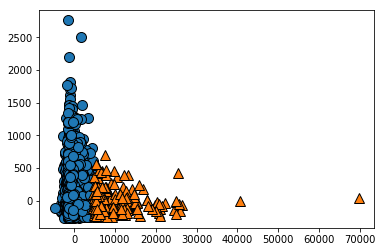

In [22]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group)  #예측

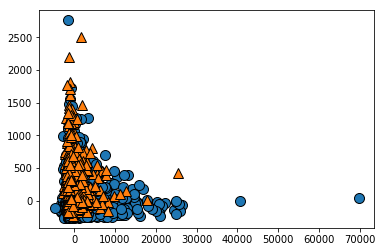

In [23]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], df.iloc[:,-1])  #실제로 돈 안갚은 사람

In [24]:
# 병합군집(k선택)
p = AgglomerativeClustering(n_clusters=2).fit_predict(x_pca)

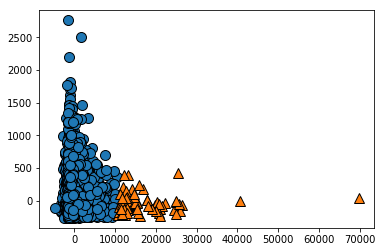

In [25]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], p) # 클러스터링 해본 결과

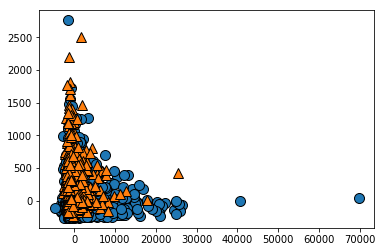

In [26]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], y) # 실제로 상품 가입해준 사람

In [27]:
# DBSCAN
p = DBSCAN(eps=1.5, min_samples=5).fit_predict(x) 

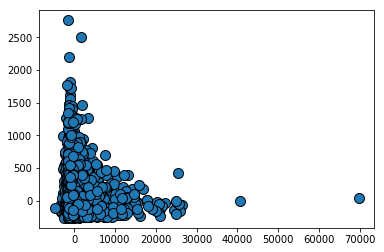

In [28]:
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p)

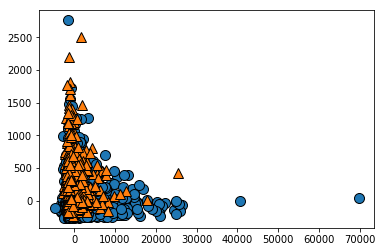

In [29]:
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], y)

In [30]:
# 결정트리 학습
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
tree = DecisionTreeClassifier().fit(x,y)
importance = pd.DataFrame(tree.feature_importances_, x.columns)

In [31]:
importance

,0
age,0.088938
balance,0.094907
day,0.099649
duration,0.258300
campaign,0.036061
pdays,0.044370
previous,0.011822
job_admin.,0.005379
job_blue-collar,0.007837
job_entrepreneur,0.001849


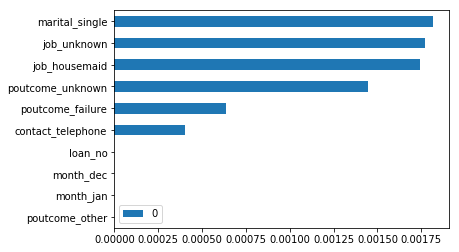

In [32]:
p = importance.sort_values(by=0).head(10).plot.barh()

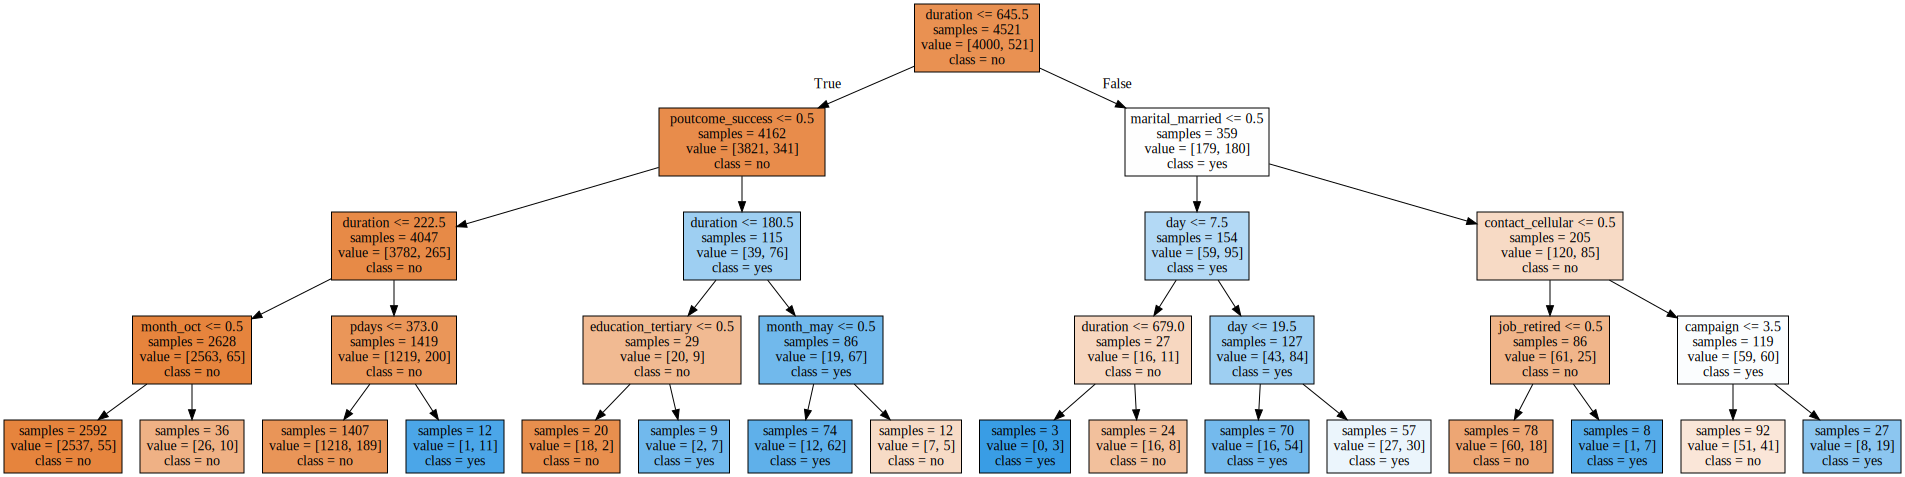

In [33]:
# 트리그래프 시각화

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

model = DecisionTreeClassifier(max_depth=4).fit(x,y)

export_graphviz(model, out_file ='bank.dot', class_names=['no','yes'], feature_names=x.columns, impurity=False, filled=True)
with open('bank.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    